<a href="https://colab.research.google.com/github/saharnazyp/TelemaicVehicle/blob/main/TelemaicVehicle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 Problem Statement
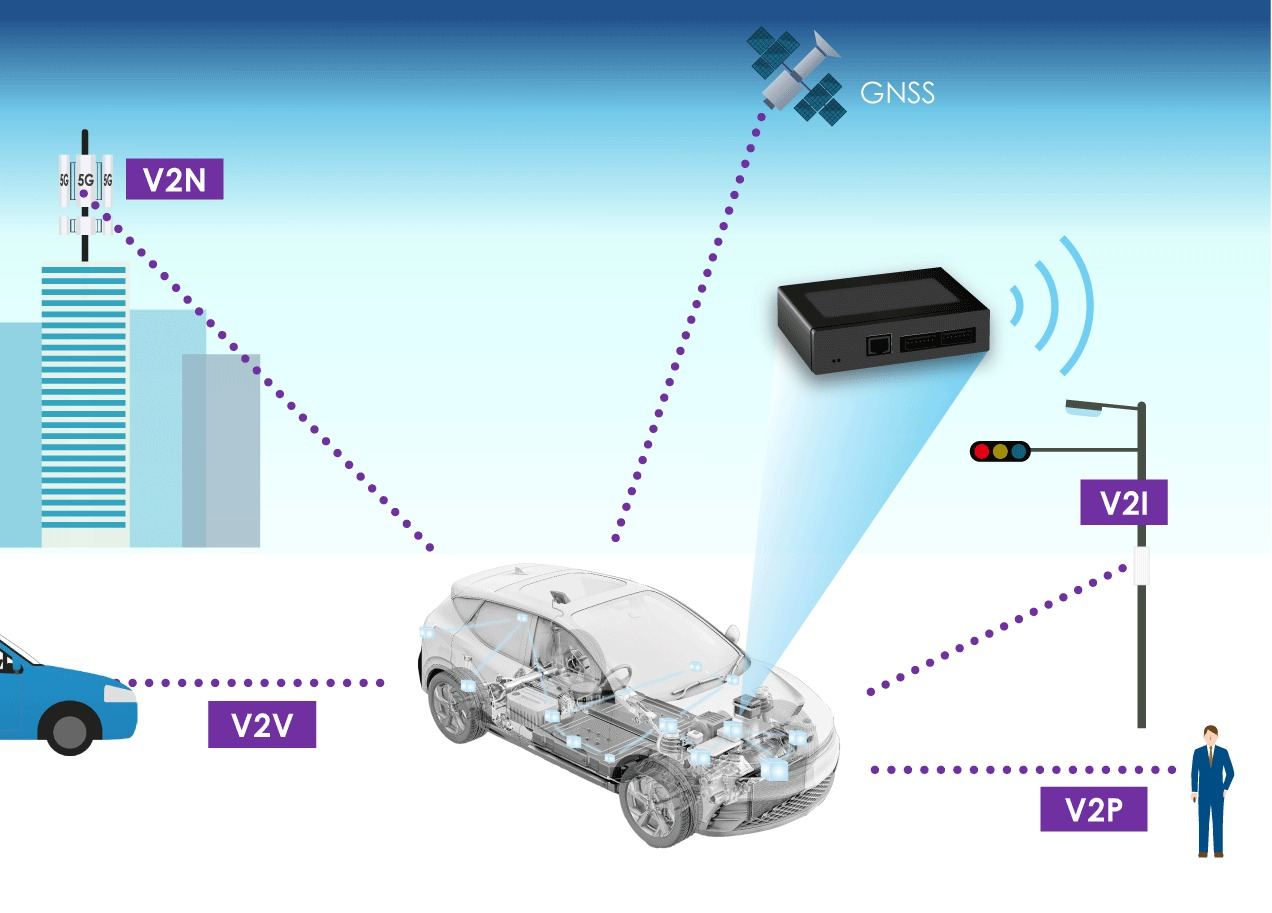
This project aims to detect vehicle status (normal/faulty) based on telematics data. We'll walk through a full data science workflow including EDA, preprocessing, modeling, and evaluation.

In [ ]:
pip install jenkspy

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

import numpy as np
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

from tensorflow.keras import layers, models

from sklearn.model_selection import GridSearchCV



from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Dense, Input

from sklearn.utils import class_weight

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import jenkspy




In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 📥 Data Loading

In [4]:
base_path = '/content/drive/MyDrive/DeepLearning/TelemaicVehicle'
os.listdir(base_path)

['allcars.csv', 'v2.csv']

In [5]:
# Mount Google Drive

base_path = '/content/drive/MyDrive/DeepLearning/TelemaicVehicle'


file_path = os.path.join(base_path, 'allcars.csv')
df = pd.read_csv(file_path, low_memory=False)

file_v2 = os.path.join(base_path, 'v2.csv')
df_v2 = pd.read_csv(file_v2, low_memory=False)

def convert_numeric_columns(df, exclude=[]):
    for col in df.columns:
        if col not in exclude:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

df_allcars = convert_numeric_columns(df_allcars, exclude=['tripID', 'deviceID', 'accData', 'timeStamp'])
df_v2 = convert_numeric_columns(df_v2, exclude=['tripID', 'deviceID', 'accData', 'timeStamp'])


NameError: name 'df_allcars' is not defined

In [ ]:
dtype_dict = {
    'tripID': str,
    'deviceID': str,
    'accData': str,
    'gps_speed': float,
    'battery': float,
    'cTemp': float,
    'dtc': float,
    'eLoad': float,
    'iat': float,
    'imap': float,
    'kpl': float,
    'maf': float,
    'rpm': float,
    'speed': float,
    'tAdv': float,
    'tPos': float
}





In [ ]:
file_path = os.path.join(base_path, 'allcars.csv')
df = pd.read_csv(file_path, low_memory=False)

for col in df.columns:
    if col != 'tripID':
        df[col] = pd.to_numeric(df[col], errors='coerce')


In [ ]:
def inspect_dataframe(df, name):
    print(f"\n📄 Inspecting `{name}`")
    print("=" * (13 + len(name)))
    print(f"🔹 Shape: {df.shape}")
    print("🔹 Columns:", ", ".join(df.columns))
    print("🔹 Preview:")
    display(df.head())

inspect_dataframe(df_allcars, "allcars.csv")


inspect_dataframe(df_v2, "v2.csv")



In [ ]:
df_v2.head()

In [ ]:
df_allcars.shape


In [ ]:
rows, columns = df_allcars.shape
print(f"Rows: {rows}, Columns: {columns}")


In [ ]:
print(f"df_allcars shape: {df_allcars.shape}")
print(f"df_v2 shape: {df_v2.shape}")

# 🔍 EDA (Exploratory Data Analysis)

*Convert Data Types in df_v2*

In [ ]:
df_allcars.info()
df_v2.info()
df_allcars.isnull().sum()
df_v2.isnull().sum()


# Columns that should be numeric (based on df_allcars)
numeric_cols = ['gps_speed', 'battery', 'cTemp', 'dtc', 'eLoad', 'iat', 'imap', 'kpl',
                'maf', 'rpm', 'speed', 'tAdv', 'tPos']

# Convert to float, setting invalid entries to NaN
for col in numeric_cols:
    df_v2[col] = pd.to_numeric(df_v2[col], errors='coerce')

# Optionally convert tripID and deviceID as well
df_v2['tripID'] = pd.to_numeric(df_v2['tripID'], errors='coerce')
df_v2['deviceID'] = pd.to_numeric(df_v2['deviceID'], errors='coerce')


# Check for Missing Values

In [ ]:
print("Missing values in df_allcars:")
print(df_allcars.isnull().sum())

print("\nMissing values in df_v2:")
print(df_v2.isnull().sum())


In [ ]:
num_duplicated_records = layoff.duplicated().sum()
print(f"Number of duplicated records is: {num_duplicated_records}")
layoff.drop_duplicates(inplace=True)
num_duplicated_records_after = layoff.duplicated().sum()
print(f"Number of duplicated records after deletion is: {num_duplicated_records_after}")


In [ ]:
df_allcars.describe()
df_v2.describe()
df_allcars.describe(include='object')
df_v2.describe(include='object')

**Basic Dataset Comparison**

In [ ]:
# Check for unique trip IDs
print("Unique tripIDs in df_allcars:", df_allcars['tripID'].nunique())
print("Unique tripIDs in df_v2:", df_v2['tripID'].nunique())

# Time range check
print("Time range in df_allcars:", df_allcars['timeStamp'].min(), "to", df_allcars['timeStamp'].max())
print("Time range in df_v2:", df_v2['timeStamp'].min(), "to", df_v2['timeStamp'].max())


# Convert timeStamp to DateTime Format

In [ ]:
df_allcars['timeStamp'] = pd.to_datetime(df_allcars['timeStamp'], errors='coerce')
df_v2['timeStamp'] = pd.to_datetime(df_v2['timeStamp'], errors='coerce')


# Initial EDA & Visualization

**Plot histogram**

In [ ]:
sns.kdeplot(data=df_v2, x=numeric_cols_v2[0], fill=True)
plt.title(f'KDE Plot of {numeric_cols_v2[0]}')
plt.show()



In [ ]:
sns.pairplot(df_allcars[numeric_cols_allcars])
plt.show()

In [ ]:
sns.kdeplot(data=df, x='gear', fill=True)
plt.title('Gear Distribution - KDE Plot')
plt.show()

In [ ]:
sns.histplot(df_allcars['speed'], kde=True)
sns.histplot(df_allcars['speed'], bins=100, kde=True)
plt.title("Speed Distribution in df_allcars")
plt.xlabel("Speed")
plt.ylabel("Frequency")
plt.show()

In [ ]:
plt.figure(figsize=(15, 6))
dataplot = sns.heatmap(df_allcars.corr(numeric_only=True), cmap='RdBu', annot=True, fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap (df_allcars)", color='royalblue', weight='bold')
plt.show()



In [ ]:
sns.boxplot(x=df_allcars['speed'])
plt.title("Boxplot of Vehicle Speed")
plt.show()

Scatter Plot

In [ ]:
sns.scatterplot(data=df_allcars, x='rpm', y='speed', alpha=0.3)
plt.title("RPM vs Speed")
plt.xlabel("RPM")
plt.ylabel("Speed")
plt.show()


## 🔍 Sample Prediction

Pairplot

In [ ]:
sample = df_allcars.sample(1000, random_state=42)
sns.pairplot(sample[['speed', 'rpm', 'gps_speed', 'kpl']])
plt.show()


# 🛠️ Preprocessing

Missing Values

**Calculate the cross-tabulation**

In [ ]:
pd.crosstab(index=df_allcars['tripID'], columns=df_allcars['deviceID'])


In [ ]:
pd.crosstab(df_allcars['deviceID'], df_allcars['dtc'])


In [ ]:
pd.crosstab(df_allcars['deviceID'], df_allcars['dtc'], normalize='index') * 100


Box Plot / Violin Plot for Battery by DeviceID

In [ ]:

print(df_allcars.isna().sum())


## 🛠️ Data Preprocessing

In [ ]:
df_allcars = df_allcars.dropna()

In [ ]:
df_allcars = df_allcars.fillna(0)
print((df_allcars == float('inf')).sum())
df_allcars = df_allcars.replace([float('inf'), -float('inf')], 0)

In [ ]:
numeric_df = df_allcars.select_dtypes(include=[np.number])
cond_number = np.linalg.cond(numeric_df.corr())

print(f"Condition number: {cond_number}")
numeric_df = df_allcars.select_dtypes(include=[np.number])

matrix = numeric_df.corr()

matrix += np.eye(matrix.shape[0]) * 1e-5


print(matrix)

In [ ]:
numeric_df = df_allcars.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr().abs()


upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))


to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]


reduced_df = numeric_df.drop(columns=to_drop)

print("remove columns", to_drop)

## 🤖 Model Building

In [ ]:

# Load your v2.csv (assuming you've already mounted the drive and read df_v2)
df = df_v2.copy()

# Convert gps_speed to numeric and clean it
df.loc[:, 'gps_speed'] = df['gps_speed'].astype(float)
df.loc[:, 'acceleration'] = df.groupby('tripID')['gps_speed'].diff().fillna(0)


# Derive features
df['acceleration'] = df.groupby('tripID')['gps_speed'].diff().fillna(0)
df['angle_change'] = df.groupby('tripID')['acceleration'].diff().fillna(0)
df['acceleration_squared'] = df['acceleration'] ** 2
df['angle_change_squared'] = df['angle_change'] ** 2

# Select features
features = ['gps_speed', 'acceleration', 'angle_change', 'acceleration_squared', 'angle_change_squared']
df_features = df[['tripID'] + features].copy()

# Normalize to [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))
df_features[features] = scaler.fit_transform(df_features[features])

# Build X array (shape: samples × 300 × 5)
X = []
trip_ids_used = []
for trip_id in df_features['tripID'].unique():
    trip_data = df_features[df_features['tripID'] == trip_id][features].values
    if len(trip_data) >= 300:
        X.append(trip_data[:300])
        trip_ids_used.append(trip_id)

X = np.array(X)
print("✅ X shape:", X.shape)

# 🔬Train and test

In [ ]:
features = ['gps_speed', 'battery', 'cTemp', 'eLoad', 'iat', 'imap', 'kpl', 'maf', 'rpm', 'speed', 'tAdv', 'tPos']
df['label'] = df['dtc'].apply(lambda x: 1 if x > 0 else 0)
X = df[features]

y = df['label']
print(df.columns.tolist())


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# 🧠 Modeling with Pipeline

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])


In [ ]:
# Create y using trip_ids_used from above
trip_stats = df.groupby('speed').agg({'speed': 'mean'})

trip_stats['label'] = trip_stats['speed'].apply(lambda x: 1 if x > 65 else 0)

X = trip_stats[['speed']]
y = trip_stats['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
model = Sequential([
    Input(shape=(1,)),  # چون فقط یک ویژگی عددی داریم (speed)
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # برای binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, y_test)
)

In [ ]:
model = Sequential([
    Input(shape=(1,)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test),
    class_weight=class_weight_dict
)

# 📈 Model Evaluation

In [ ]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("Accuracy over epochs")
plt.show()


y_pred = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


In [ ]:
predictions = model.predict(X_test)


In [ ]:
gear_data = df['gear'].dropna().values
breaks = jenkspy.jenks_breaks(gear_data, nb_class=3)
print("Jenks Natural Breaks:", breaks)
breaks = jenkspy.jenks_breaks(gear_data, nb_class=3)
print("Jenks Natural Breaks:", breaks)


df['gear_group'] = pd.cut(df['gear'], bins=breaks, labels=['Low', 'Medium', 'High'], include_lowest=True)

In [ ]:
sns.histplot(data=df, x='gear', hue='gear_group', palette='Set2', multiple='stack')
plt.title('Gear Grouping by Jenks Breaks')
plt.show()


## 💾 Save Trained Model

In [ ]:
model.save('my_model.h5')
